## importo las librerias que voy a necesitar

In [1]:
import numpy as np
import pandas as pd

## Importo el dataset:  'diamonds_train' y le echo un  👁 !!

In [2]:
diamante = pd.read_csv('./input/diamonds_train.csv')

In [3]:
diamante.head()

id  carat      cut color clarity  depth  table     x     y     z  price
0   0   0.78  Premium     F     VS1   61.5   58.0  5.93  5.98  3.66   3446
1   1   0.31    Ideal     D     SI1   60.8   56.0  4.37  4.32  2.64    732
2   2   0.30    Ideal     F     SI1   62.3   54.0  4.30  4.34  2.69    475
3   3   1.04    Ideal     E    VVS2   62.0   58.0  6.54  6.46  4.03   9552
4   4   0.65    Ideal     J     SI1   61.4   55.0  5.58  5.62  3.44   1276

In [4]:
print(diamante.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [5]:
diamante.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No tiene valores nulos, hay 8 columnas numericas y 3 de tipo objeto

In [6]:
#pongo la columna id como indice
diamante = diamante.set_index("id")
diamante.head()

carat      cut color clarity  depth  table     x     y     z  price
id                                                                     
0    0.78  Premium     F     VS1   61.5   58.0  5.93  5.98  3.66   3446
1    0.31    Ideal     D     SI1   60.8   56.0  4.37  4.32  2.64    732
2    0.30    Ideal     F     SI1   62.3   54.0  4.30  4.34  2.69    475
3    1.04    Ideal     E    VVS2   62.0   58.0  6.54  6.46  4.03   9552
4    0.65    Ideal     J     SI1   61.4   55.0  5.58  5.62  3.44   1276

**vamos a empezar con la columna 'cut'**

In [7]:
diamante['cut'].unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [8]:
diamante['cut'].value_counts()

Ideal        16141
Premium      10303
Very Good     9068
Good          3631
Fair          1202
Name: cut, dtype: int64

In [9]:
#Hago un diccionario para asignar valores a la columna 

In [10]:
def num_cut (row):
    groups = {
        "Ideal": 1,
        "Premium" : 2,
        "Very Good" : 3,
        "Good" : 4,
        "Fair" : 5
    }
    return groups[row]


#diamante = pd.get_dummies(diamante, columns=['cut'])
# diamante = pd.get_dummies(diamante,columns=['cut'],prefix="",prefix_sep="")

In [11]:
#cambio los datos de la columna 'cut' por los valores
diamante['cut'] = diamante['cut'].apply(lambda x: num_cut(x))
diamante.head()

carat  cut color clarity  depth  table     x     y     z  price
id                                                                 
0    0.78    2     F     VS1   61.5   58.0  5.93  5.98  3.66   3446
1    0.31    1     D     SI1   60.8   56.0  4.37  4.32  2.64    732
2    0.30    1     F     SI1   62.3   54.0  4.30  4.34  2.69    475
3    1.04    1     E    VVS2   62.0   58.0  6.54  6.46  4.03   9552
4    0.65    1     J     SI1   61.4   55.0  5.58  5.62  3.44   1276

In [12]:
#compruebo que pasa con la columna cut
print(diamante['cut'].dtypes)

int64


** Ya tengo la columna 'cut' en numerica**

**Vamos con la columna 'color'**   from J (worst) to D (best)

In [13]:
diamante['color'].unique()

array(['F', 'D', 'E', 'J', 'H', 'I', 'G'], dtype=object)

In [14]:
def num_color (row):
    groups = {
        "D" : 1,
        "E" : 2,
        "F" : 3,
        "G" : 4,
        "H" : 5,
        "I" : 6,
        "J" : 7
    }
    return groups[row]

In [15]:
diamante['color'] = diamante['color'].apply(lambda x: num_color(x))
diamante.head()

carat  cut  color clarity  depth  table     x     y     z  price
id                                                                  
0    0.78    2      3     VS1   61.5   58.0  5.93  5.98  3.66   3446
1    0.31    1      1     SI1   60.8   56.0  4.37  4.32  2.64    732
2    0.30    1      3     SI1   62.3   54.0  4.30  4.34  2.69    475
3    1.04    1      2    VVS2   62.0   58.0  6.54  6.46  4.03   9552
4    0.65    1      7     SI1   61.4   55.0  5.58  5.62  3.44   1276

In [16]:
print(diamante['color'].dtypes)

int64


**Termino con la ultima columna object... 'clarity'** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [17]:
def num_clarity (row):
    groups = {
        "IF" : 1,
        "VVS1" : 2,
        "VVS2" : 3,
        "VS1" : 4,
        "VS2" : 5,
        "SI1" : 6,
        "SI2" : 7,
        "I1" : 8
    }
    return groups[row]

In [18]:
diamante['clarity'] = diamante['clarity'].apply(lambda x: num_clarity(x))
diamante.head()

carat  cut  color  clarity  depth  table     x     y     z  price
id                                                                   
0    0.78    2      3        4   61.5   58.0  5.93  5.98  3.66   3446
1    0.31    1      1        6   60.8   56.0  4.37  4.32  2.64    732
2    0.30    1      3        6   62.3   54.0  4.30  4.34  2.69    475
3    1.04    1      2        3   62.0   58.0  6.54  6.46  4.03   9552
4    0.65    1      7        6   61.4   55.0  5.58  5.62  3.44   1276

In [19]:
print(diamante.dtypes)

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [20]:
diamante.to_csv("./output/diamante.csv")

## Ya tengo todas las columnas numericas y limpias !!!🥵

## Mapa de calor con la matriz de correlacion de las columnas

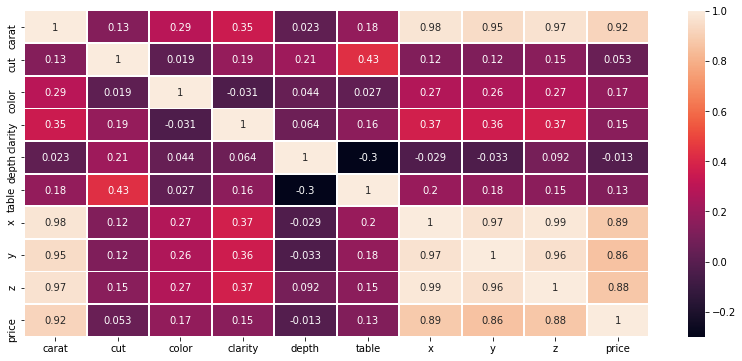

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = diamante.corr()
correlation_matrix

plt.subplots(figsize=(14,6))
heat_map = sns.heatmap(correlation_matrix, linewidths=.7, annot = True)

No borro nada para tener mas datos, aunque 'x','y','z' estan muy relacionadas entre si

## Vamos a entrenar el modelo

In [21]:
from sklearn.model_selection import train_test_split

y=diamante['price']
c=list(diamante.columns)
c.remove('price')
X=diamante[c]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 9) (8069, 9) (32276,) (8069,)


In [22]:
from sklearn import linear_model

diamante_model= linear_model.LinearRegression()
brilla = diamante_model.fit(X_train,y_train)
print(brilla.coef_)
print(brilla.intercept_)

[10876.58655568  -110.27649103  -324.2659189   -498.28869522
   -81.42568255   -31.51278346  -999.84477      114.95809584
   -28.7673616 ]
11130.271219279559


In [23]:
precio_pred = brilla.predict(X_train)

In [24]:
from sklearn.metrics import r2_score

r2_score(y_train, precio_pred)

0.9072133690814131

## IMPORTO EL TEST.CSV

In [25]:
df_test = pd.read_csv("./input/diamonds_test.csv")
df_test.head()

id  carat      cut color clarity  depth  table     x     y     z
0   0   1.10  Premium     H     SI2   62.2   58.0  6.69  6.60  4.13
1   1   0.51    Ideal     I     SI1   62.5   57.0  5.07  5.10  3.18
2   2   2.03  Premium     G     SI1   61.9   59.0  8.14  8.09  5.02
3   3   1.21  Premium     F     SI1   60.0   60.0  6.96  6.91  4.16
4   4   0.55    Ideal     F     SI1   61.8   55.0  5.27  5.22  3.24

**Cambios para tenerlo igual hasta el entrenamiento**

In [26]:
df_test.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [27]:
#pongo la columna id como indice
df_test = df_test.set_index("id")
df_test.head()

carat      cut color clarity  depth  table     x     y     z
id                                                              
0    1.10  Premium     H     SI2   62.2   58.0  6.69  6.60  4.13
1    0.51    Ideal     I     SI1   62.5   57.0  5.07  5.10  3.18
2    2.03  Premium     G     SI1   61.9   59.0  8.14  8.09  5.02
3    1.21  Premium     F     SI1   60.0   60.0  6.96  6.91  4.16
4    0.55    Ideal     F     SI1   61.8   55.0  5.27  5.22  3.24

In [28]:
#cambio los datos de la columna 'cut' por los valores
df_test['cut'] = df_test['cut'].apply(lambda x: num_cut(x))
df_test.head()

carat  cut color clarity  depth  table     x     y     z
id                                                          
0    1.10    2     H     SI2   62.2   58.0  6.69  6.60  4.13
1    0.51    1     I     SI1   62.5   57.0  5.07  5.10  3.18
2    2.03    2     G     SI1   61.9   59.0  8.14  8.09  5.02
3    1.21    2     F     SI1   60.0   60.0  6.96  6.91  4.16
4    0.55    1     F     SI1   61.8   55.0  5.27  5.22  3.24

In [29]:
df_test['color'] = df_test['color'].apply(lambda x: num_color(x))
df_test.head()

carat  cut  color clarity  depth  table     x     y     z
id                                                           
0    1.10    2      5     SI2   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6     SI1   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4     SI1   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3     SI1   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3     SI1   61.8   55.0  5.27  5.22  3.24

In [30]:
df_test['clarity'] = df_test['clarity'].apply(lambda x: num_clarity(x))
df_test.head()

carat  cut  color  clarity  depth  table     x     y     z
id                                                            
0    1.10    2      5        7   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6        6   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4        6   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3        6   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3        6   61.8   55.0  5.27  5.22  3.24

In [31]:
df_test.to_csv("./output/df_test.csv")
df_test.head()

carat  cut  color  clarity  depth  table     x     y     z
id                                                            
0    1.10    2      5        7   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6        6   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4        6   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3        6   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3        6   61.8   55.0  5.27  5.22  3.24

In [32]:
df_test1 = df_test
df_test1.head()

carat  cut  color  clarity  depth  table     x     y     z
id                                                            
0    1.10    2      5        7   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6        6   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4        6   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3        6   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3        6   61.8   55.0  5.27  5.22  3.24

In [33]:
price = brilla.predict(df_test1)

In [34]:
df_test1['price']=price

In [35]:
df_submmit = df_test1[['price']]

In [36]:
df_submmit.head()

price
id              
0    4823.146810
1     171.985465
2   14449.751537
3    7047.318700
4    1511.970205

In [37]:
df_submmit.to_csv("./output/viernes.csv")

### PRUEBO CON OTROS TEST###

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
y=diamante['price']
c=list(diamante.columns)
c.remove('price')
X=diamante[c]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 9) (8069, 9) (32276,) (8069,)


In [40]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=11)

**Entreno todos los modelos del diccionario models**

In [41]:
models = {
    "Linear": LinearSVR(),
    "neigbor":KNeighborsRegressor(),
    "boosting": GradientBoostingRegressor(),
    "boosting2": GradientBoostingRegressor(n_estimators=500),
    "boosting3": GradientBoostingRegressor(n_estimators=1000),
    "histboosting": HistGradientBoostingRegressor(),
    "histboosting2": HistGradientBoostingRegressor(learning_rate=0.2),
    "histboosting3": HistGradientBoostingRegressor(learning_rate=0.4),
    "forest": RandomForestRegressor(),
    "forest250": RandomForestRegressor(n_estimators=250),
    "forest350": RandomForestRegressor(n_estimators=350),
    "tree": DecisionTreeClassifier(random_state=0, max_depth=2)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf, n_jobs=2)))


Training model: Linear
0.7944679726190292
Training model: neigbor
0.9483028335886334
Training model: boosting
0.9752422843801183
Training model: boosting2
0.9796394496031414
Training model: boosting3
0.9803585761054835
Training model: histboosting
0.9813289195489668
Training model: histboosting2
0.9808686847954962
Training model: histboosting3
0.9793290685196027
Training model: forest


/home/jose/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9780439287186841
Training model: forest250
0.980175267738076
Training model: forest350
0.9801506696557872
Training model: tree
-0.6993905151076053


## Voy a probar con el modelo histboosting

In [42]:
d_model= HistGradientBoostingRegressor()
histb = d_model.fit(X_train,y_train)


pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9859302643060313

In [43]:

df_test = df_test.drop(columns=['price'])
df_test.head()

carat  cut  color  clarity  depth  table     x     y     z
id                                                            
0    1.10    2      5        7   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6        6   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4        6   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3        6   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3        6   61.8   55.0  5.27  5.22  3.24

In [44]:
price = histb.predict(df_test)

In [45]:
df_test['price']=price

In [46]:
df_submmit = df_test[['price']]

In [47]:
df_submmit.head()

price
id              
0    4404.938464
1    1138.957666
2   16545.145192
3    6529.616868
4    1478.779511

In [48]:
df_submmit.to_csv("./output/histboosting.csv")

##  modelo histboosting2

In [49]:
d_model= GradientBoostingRegressor(n_estimators=500)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9852212525539773

In [50]:
df_test = df_test.drop(columns=['price'])
df_test.head()

carat  cut  color  clarity  depth  table     x     y     z
id                                                            
0    1.10    2      5        7   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6        6   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4        6   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3        6   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3        6   61.8   55.0  5.27  5.22  3.24

In [51]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4274.092186
1    1136.118977
2   16886.548007
3    7168.982573
4    1562.944905

In [52]:
df_submmit.to_csv("./output/histboosting2.csv")

 ## modelo histboosting3 ¡¡¡este es el que gana!!!

In [53]:
d_model= GradientBoostingRegressor(n_estimators=1000)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9880898146658088

In [54]:
df_test = df_test.drop(columns=['price'])
df_test.head()

carat  cut  color  clarity  depth  table     x     y     z
id                                                            
0    1.10    2      5        7   62.2   58.0  6.69  6.60  4.13
1    0.51    1      6        6   62.5   57.0  5.07  5.10  3.18
2    2.03    2      4        6   61.9   59.0  8.14  8.09  5.02
3    1.21    2      3        6   60.0   60.0  6.96  6.91  4.16
4    0.55    1      3        6   61.8   55.0  5.27  5.22  3.24

In [55]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4304.919110
1    1098.932952
2   16960.211975
3    7151.145109
4    1522.649878

In [56]:
df_submmit.to_csv("./output/histboosting3.csv")

## modelo linear


In [57]:
d_model= LinearSVR()
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.8029782791902662

In [58]:
df_test = df_test.drop(columns=['price'])

In [59]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4972.731671
1     946.480111
2   10126.211663
3    6327.947723
4    1866.803680

In [60]:
df_submmit.to_csv("./output/linear.csv")

## modelo neigbor

In [61]:
d_model= KNeighborsRegressor()
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9672453481456161

In [62]:
df_test = df_test.drop(columns=['price'])

In [63]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id         
0    4781.8
1    1167.8
2   14977.8
3    5486.6
4    1418.8

In [64]:
df_submmit.to_csv("./output/neigbor.csv")

## modelo boosting

In [65]:
d_model= GradientBoostingRegressor()
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9773673589191681

In [66]:
df_test = df_test.drop(columns=['price'])

In [67]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4172.294336
1    1141.383067
2   16623.272728
3    7164.870912
4    1606.821169

In [68]:
df_submmit.to_csv("./output/boosting.csv")

## modelo boosting2

In [69]:
d_model= GradientBoostingRegressor(n_estimators=500)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9852212525539773

In [70]:
df_test = df_test.drop(columns=['price'])

In [71]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4274.092186
1    1136.118977
2   16886.548007
3    7168.982573
4    1562.944905

In [72]:
df_submmit.to_csv("./output/boosting2.csv")

## modelo boosting3

In [73]:
d_model= GradientBoostingRegressor(n_estimators=1000)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9880898146658088

In [74]:
df_test = df_test.drop(columns=['price'])

In [75]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4304.919110
1    1098.932952
2   16960.211975
3    7151.145109
4    1522.649878

In [76]:
df_submmit.to_csv("./output/boosting3.csv")

## modelo forest

In [77]:
d_model= RandomForestRegressor()
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

/home/jose/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9963252094449255

In [78]:
df_test = df_test.drop(columns=['price'])

In [79]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id         
0    4429.7
1    1021.1
2   16803.3
3    6450.1
4    1543.0

In [80]:
df_submmit.to_csv("./output/forest.csv")

## modelo forest250

In [81]:
d_model = RandomForestRegressor(n_estimators=250)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.997362177166113

In [82]:
df_test = df_test.drop(columns=['price'])

In [83]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id            
0    4596.4640
1    1015.2560
2   16324.5560
3    6815.3840
4    1486.0776

In [84]:
df_submmit.to_csv("./output/forest250.csv")

## modelo forest350

In [85]:
d_model = RandomForestRegressor(n_estimators=350)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

0.9973612991282338

In [86]:
df_test = df_test.drop(columns=['price'])

In [87]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id              
0    4576.940000
1    1013.594286
2   16263.888571
3    6733.217143
4    1489.647143

In [88]:
df_submmit.to_csv("./output/forest350.csv")

## modelo tree

In [89]:
d_model = DecisionTreeClassifier(random_state=0, max_depth=2)
histb = d_model.fit(X_train,y_train)

pr_pred = histb.predict(X_train)
r2_score(y_train, pr_pred)

-0.6992141756436621

In [90]:
df_test = df_test.drop(columns=['price'])

In [91]:
price = histb.predict(df_test)
df_test['price']=price
df_submmit = df_test[['price']]
df_submmit.head()

price
id       
0     596
1     596
2     596
3     596
4     596

In [92]:
df_submmit.to_csv("./output/tree.csv")